<a href="https://colab.research.google.com/github/MaisterLupo/AI-Data-Analysis/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an Explorative Data Analysis of the dataset Most Streamed Spotify Songs 2024.
Even it is refered to 'Spotify', it contains also numbers of each track from other streaming platforms.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

I started importing main libraries needed for: \
**The data visualization task**:
* Matplotlib
* Seaborn

**The data manipulation task**:
* Pandas

**The data interaction capability**:
* Ipywidgets

In [4]:
df = pd.read_csv('streamed_song.csv', encoding='unicode_escape')
df.head()
# prime 5 righe per capire il nostro dataset

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
df.info()
# il nostro dataset è formato da 4600 righe e 29 colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

As we can see, this dataset contains:
* 4600 rows
* 29 columns
* nan values
* values of type object, float64 and int64

In [6]:
df.nunique()

Track                         4370
Album Name                    4005
Artist                        1999
Release Date                  1562
ISRC                          4598
All Time Rank                 4577
Track Score                    862
Spotify Streams               4425
Spotify Playlist Count        4207
Spotify Playlist Reach        4478
Spotify Popularity              94
YouTube Views                 4290
YouTube Likes                 4283
TikTok Posts                  3318
TikTok Likes                  3615
TikTok Views                  3616
YouTube Playlist Reach        3458
Apple Music Playlist Count     322
AirPlay Spins                 3267
SiriusXM Spins                 689
Deezer Playlist Count          233
Deezer Playlist Reach         3558
Amazon Playlist Count          147
Pandora Streams               3491
Pandora Track Stations        2975
Soundcloud Streams            1265
Shazam Counts                 4002
TIDAL Popularity                 0
Explicit Track      

Through number of uniques inside one columns, we can understand which of them is useless to analyze.
These columns, from my perspective, are:
* ISRC
* All Time Rack
* Tidal Popularity

**Features delle Track** \
* **Track**: nome della traccia
* **Album Name**: nome dell'album
* **Artist**: nome dell'artista/band
* **Release Data**: data di rilascio
* **ISRC**: codice univoco della traccia
* **All Time Rank**: Punteggio assoluto di una traccia in base alla sua popolarità
* **Track Score**: punteggio di una traccia in base a dei valori
* **Explicit Track**: indica se la traccia ha contenuti espliciti

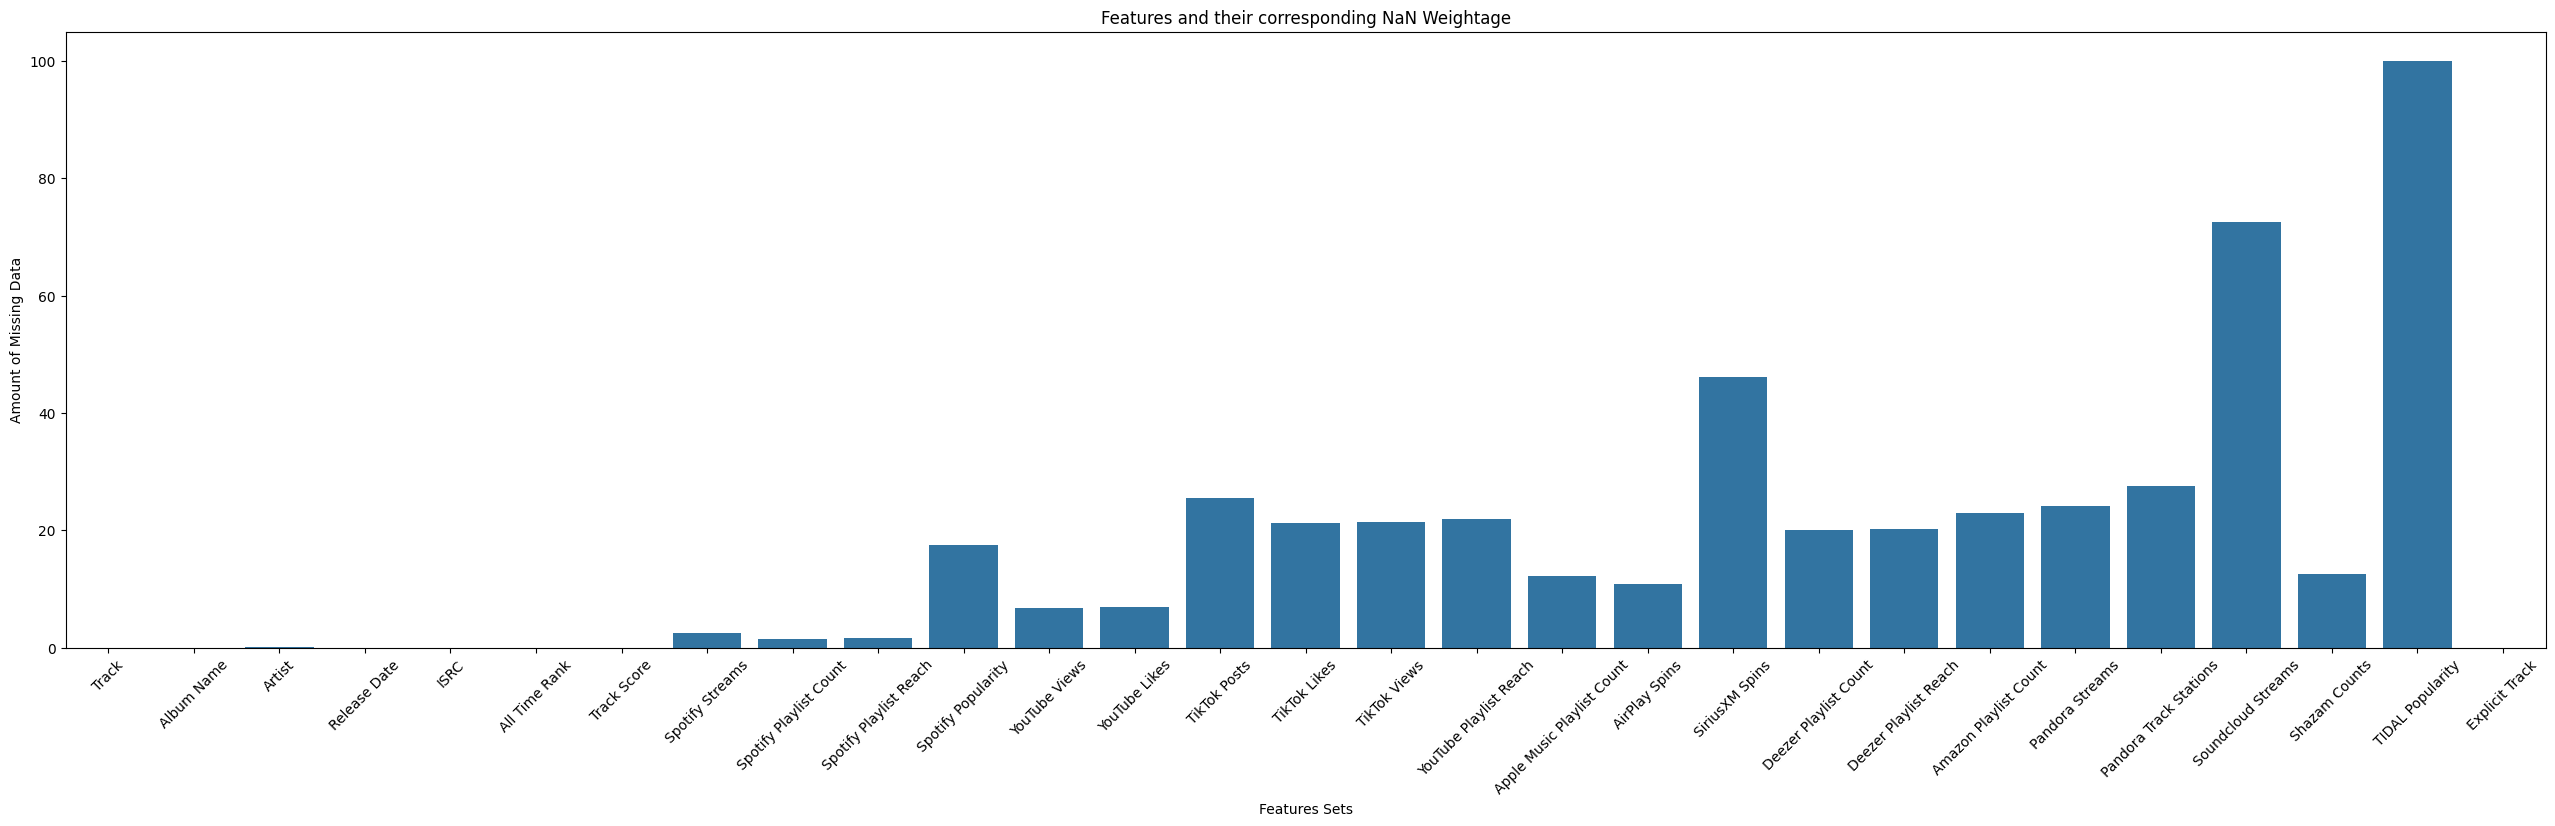

In [7]:
nan_df = pd.DataFrame(df.isna().sum(), columns = ['Sum_NaN'])
nan_df['feature_set'] = nan_df.index
nan_df['amount_percent'] = (nan_df['Sum_NaN']/4600)*100
plt.figure(figsize = (32,8))
sns.barplot(x = nan_df['feature_set'], y = nan_df['amount_percent'])
plt.xticks(rotation=45)
plt.title('Features and their corresponding NaN Weightage')
plt.xlabel('Features Sets')
plt.ylabel('Amount of Missing Data')
plt.show()

As we saw before, this datasets contains nan values. It is necessary to clean it in order to continue the explorative data analysis otherwise it would be difficult to manipulare different type of values inside our columns

In [8]:
df = df.fillna(0)

I cleaned the dataset filling all the nan values with integer '0'

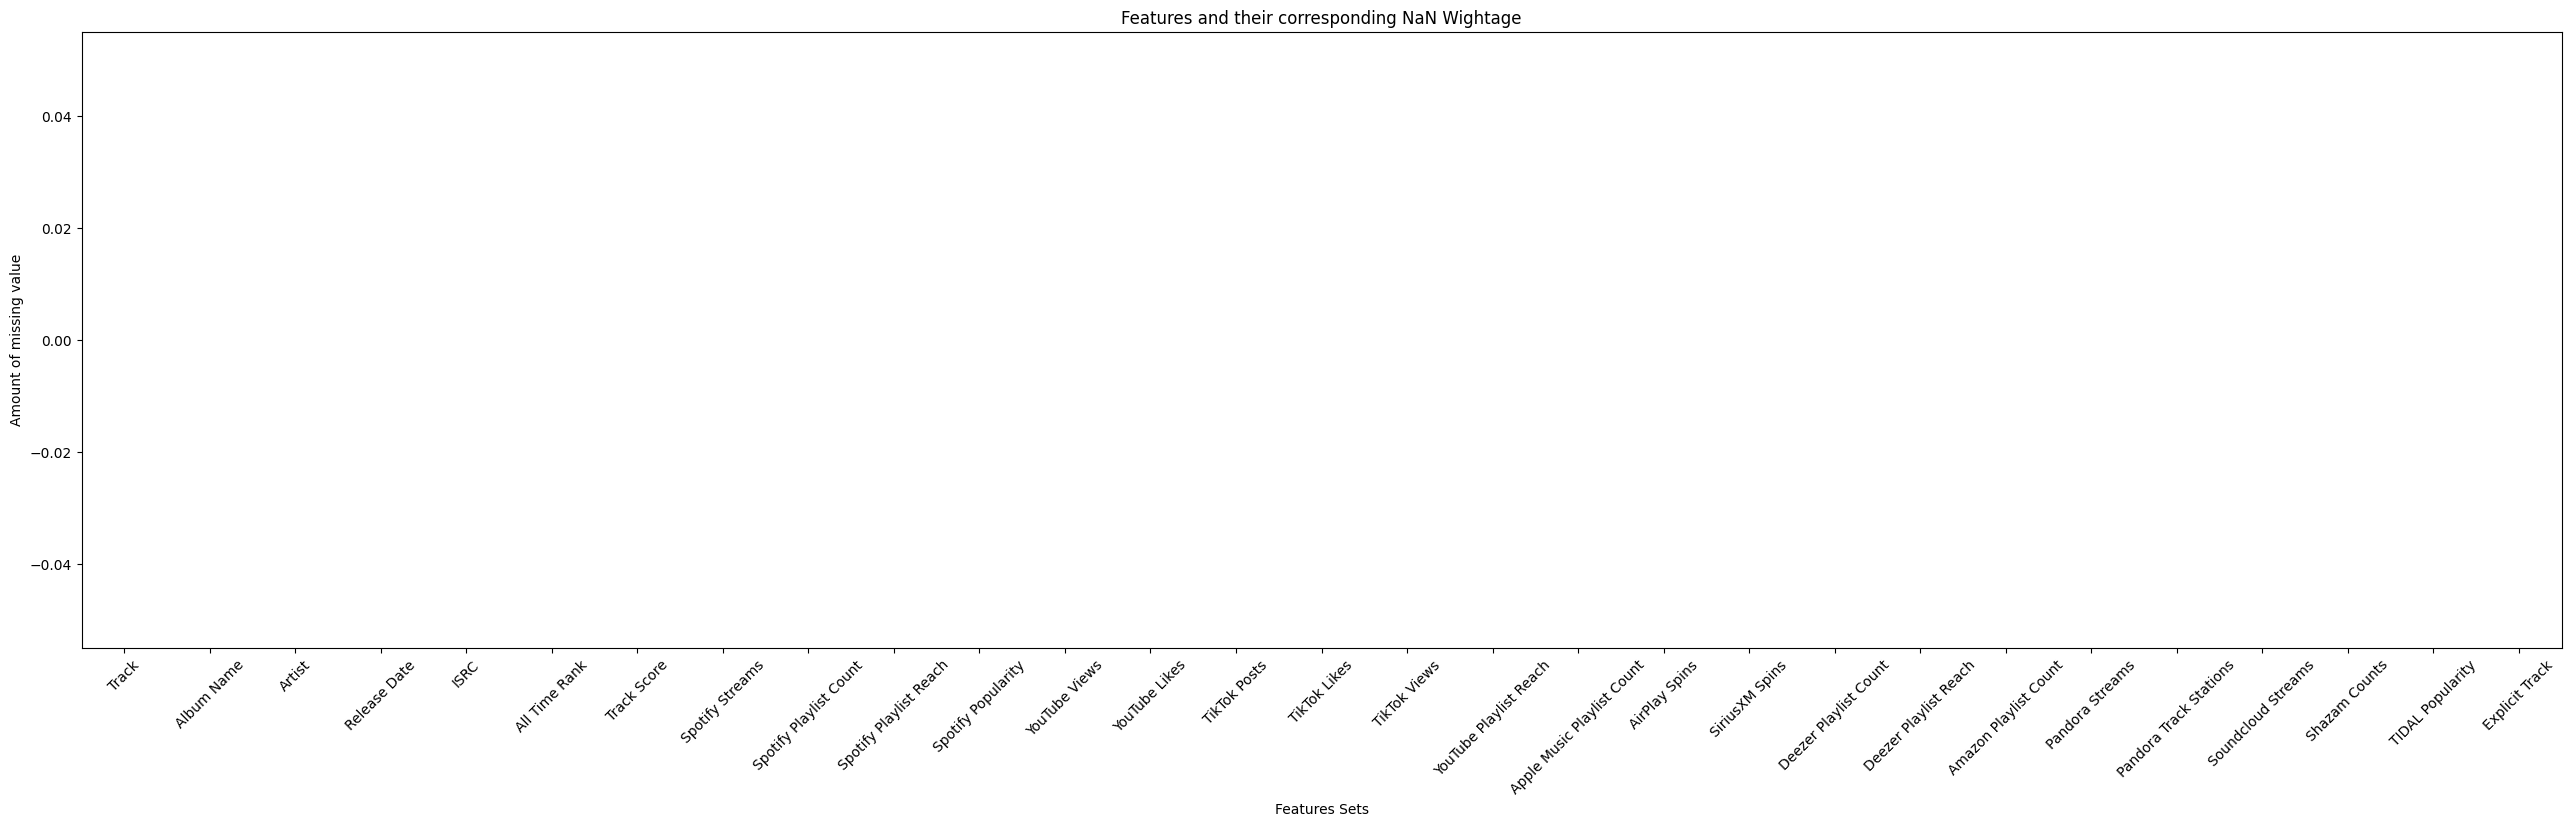

In [9]:
nan_df = pd.DataFrame(df.isna().sum(), columns = ['Sum_NaN'])
nan_df['feature_set'] = nan_df.index
nan_df['amount_percent'] = (nan_df['Sum_NaN']/4600)*100
plt.figure(figsize=(32,8))
sns.barplot(x = nan_df['feature_set'], y = nan_df['amount_percent'])
plt.xticks(rotation=45)
plt.xlabel('Features Sets')
plt.ylabel('Amount of missing value')
plt.title('Features and their corresponding NaN Wightage')
plt.show()

Now, I selected questions that might be answer when seeing this datasets.
* Who are the Top 10 Artists with the highest number of tracks in the dataset?
* For each streaming platforms, which is the most viewed/streamed song?
* For each streaming platforms, which is the most viewed/streamed Album?
* For each streaming platforms, which is the most viewed/streamed Artist?
* For each streaming platforms, which is the most added song in a playlist?
* For streaming platforms such as Youtube and TikTok, which is the most liked song?
* For the app Shazam, which is the most researched song?

In [10]:
artist = df.groupby('Artist')['Track'].count().reset_index()
artist = artist.sort_values(by= 'Track',ascending=False).reset_index()

def igraph(vale=10):
  graph = artist[:vale]
  plt.figure(figsize=(12,5))
  plt.title('Top 10 Artists with highest number of songs')
  plt.xlabel('Artists')
  plt.ylabel('Number of Tracks')
  ax = sns.barplot(graph, x='Artist', y='Track')
  for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  plt.xticks(rotation=45)
  plt.show()

In [11]:
interactive(igraph, vale=(3,20))

interactive(children=(IntSlider(value=10, description='vale', max=20, min=3), Output()), _dom_classes=('widget…

* Who are the Top 10 Artists with the highest number of tracks in the dataset?
1. Drake
2. Taylor Swift
3. Bad Bunny
4. KAROL G
5. The Weeknd
6. Travis Scott
7. Billie Eilish
8. Ariana Grande
9. Future
10. Post Malone

Thanks to the ipywidgets library, it is possible to answer this question, also specifying the number of artists inside our graph, from a minimum of 3, to a maximum of 20. Try yourself this dynamic graph moving the cursor above the button from left to right

Apart from columns 'Track', 'Album Name', 'Artist', 'Release Date', 'Track Score', 'Spotify Popularity'

the other columns contain numbers but with the comma. It means these numbers are neither integer nor float but strings. And also, since I filled each nan value with a integer '0', now I have two different types of objects inside each columns complicating the situation.

My goal, to perform correctly the analysis, is to convert all these values into integer, in order to properly graphically represent them.

In [12]:
def conv(valore):
  valore = str(valore)
  valore = valore.replace(',','')
  valore = int(valore)
  return int(valore)

I created 'conv function' that means 'convertor' with parameter 'valore', to pass inside it each value, converting it into a string, replacing the ',' with nothing '' and then converting it into an integer.

In [13]:
# dato che alcune colonne come ISRC, All Time Rank e TIDAL non ci mostrano alcuna utilità, le togliamo
df = df.drop(['ISRC'], axis=1)
df = df.drop(['TIDAL Popularity'], axis=1)
df = df.drop(['All Time Rank'], axis=1)
df

,Track,Album Name,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",0,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747",...,6,0,2.0,"14,217",0.0,"20,104,066","13,184","50,633,006","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245",...,412,0,1.0,927,0.0,0,0,0,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333",...,204,0,1.0,74,6.0,"84,426,740","28,999",0,"1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159",...,"1,200",0,0.0,0,7.0,"6,817,840",0,0,"448,292",0


Here I dropped the columns that in my opinion are not usefull for the analysis \
* ISRC
* All Time Rank
* TIDAL Popularity

Adesso andiamo a scoprire qual è la canzone con più like su YouTube e TikTok

In [14]:
df_track = pd.DataFrame()
df_track = pd.concat([df['Track'], df['Album Name'], df['Artist']], axis=1, join="inner")
df_track
df_records = df.drop(['Track','Album Name','Artist','Release Date','Track Score','Explicit Track','Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count'], axis=1)
df_records

,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,AirPlay Spins,SiriusXM Spins,Deezer Playlist Reach,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,"390,470,936","30,716","196,631,588","84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040","40,975",684,"17,598,718","18,004,655","22,931","4,818,457","2,669,262"
1,"323,703,884","28,113","174,597,137","116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351","40,778",3,"10,422,430","7,780,028","28,444","6,623,075","1,118,279"
2,"601,309,283","54,331","211,607,669","122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955","74,333",536,"36,321,847","5,022,621","5,639","7,208,651","5,285,340"
3,"2,031,280,633","269,802","136,569,078","1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582","1,474,799","2,182","24,684,248","190,260,277","203,384",0,"11,822,942"
4,"107,034,922","7,223","151,469,874","77,373,957","3,670,188","16,400",0,0,"112,763,851","12,185",1,"17,660,624","4,493,884","7,006","207,179","457,017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,"305,049,963","65,770","5,103,054","149,247,747","1,397,590","48,370","20,202,000","143,934,379","53,016",6,0,"14,217","20,104,066","13,184","50,633,006","656,337"
4596,"52,282,360","4,602","1,449,767","943,920,245","5,347,766",0,"1,721","19,935","24,973,048",412,0,927,0,0,0,"193,590"
4597,"189,972,685","72,066","6,704,802","201,027,333","1,081,402","7,596","5,288,677","36,849,005","29,253,152",204,0,74,"84,426,740","28,999",0,"1,135,998"
4598,"145,467,020","14,037","7,387,064","1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","25,150,516","1,200",0,0,"6,817,840",0,0,"448,292"


To manipulate the dataset, I decided to split it into two different datasets.
* **df_track:** it contains the features of the tracks
* **df_records:** it contains the numbers of the tracks in each platforms

I did so because they have different type of objects and the next step is to manipulate df_records datasets.

In [15]:
for feature in df_records:
  df_records[feature] = df[feature].apply(lambda x: conv(x))


df_records2 = pd.concat([df_track, df_records], axis=1)
df_records2

In [16]:
df_records2 = pd.concat([df_track, df_records], axis=1)
df_records2

,Track,Album Name,Artist,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,AirPlay Spins,SiriusXM Spins,Deezer Playlist Reach,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,390470936,30716,196631588,84274754,1713126,5767700,651565900,5332281936,150597040,40975,684,17598718,18004655,22931,4818457,2669262
1,Not Like Us,Not Like Us,Kendrick Lamar,323703884,28113,174597137,116347040,3486739,674700,35223547,208339025,156380351,40778,3,10422430,7780028,28444,6623075,1118279
2,i like the way you kiss me,I like the way you kiss me,Artemas,601309283,54331,211607669,122599116,2228730,3025400,275154237,3369120610,373784955,74333,536,36321847,5022621,5639,7208651,5285340
3,Flowers,Flowers - Single,Miley Cyrus,2031280633,269802,136569078,1096100899,10629796,7189811,1078757968,14603725994,3351188582,1474799,2182,24684248,190260277,203384,0,11822942
4,Houdini,Houdini,Eminem,107034922,7223,151469874,77373957,3670188,16400,0,0,112763851,12185,1,17660624,4493884,7006,207179,457017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,305049963,65770,5103054,149247747,1397590,48370,20202000,143934379,53016,6,0,14217,20104066,13184,50633006,656337
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,52282360,4602,1449767,943920245,5347766,0,1721,19935,24973048,412,0,927,0,0,0,193590
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,189972685,72066,6704802,201027333,1081402,7596,5288677,36849005,29253152,204,0,74,84426740,28999,0,1135998
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,145467020,14037,7387064,1118595159,3868828,11433,2534831,37757301,25150516,1200,0,0,6817840,0,0,448292


Now, I concatenated again the two datasets into df_records2

In [17]:
feature = [col for col in df_records2.columns]
feature

['Track',
 'Album Name',
 'Artist',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'AirPlay Spins',
 'SiriusXM Spins',
 'Deezer Playlist Reach',
 'Pandora Streams',
 'Pandora Track Stations',
 'Soundcloud Streams',
 'Shazam Counts']

In [18]:
def igraph3(nume=10, x_value='Youtube Likes', y_value='Track'):
  grec = df_records2.sort_values(by =y_value, ascending=False)
  grecords2 = grec.head(nume)
  plt.figure(figsize=(15,5))
  plt.title('Dynamic Graph')
  plt.xlabel('Track')
  plt.ylabel('Total number')
  ax2 = sns.barplot(grecords2, x=x_value, y=y_value)
  for p in ax2.patches:
      height = p.get_height()
      ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  plt.xticks(rotation=60)
  plt.show()

In [19]:
widgets.interact(igraph3, x_value=widgets.Dropdown(description='choose one', options=['Track','Album Name','Artist',]), y_value=widgets.Dropdown(description='choose one', options=[
'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'AirPlay Spins',
 'SiriusXM Spins',
 'Deezer Playlist Reach',
 'Pandora Streams',
 'Pandora Track Stations',
 'Soundcloud Streams',
 'Shazam Counts']), nume=(3,20))

interactive(children=(IntSlider(value=10, description='nume', max=20, min=3), Dropdown(description='choose one…

<function __main__.igraph3(nume=10, x_value='Youtube Likes', y_value='Track')>

* For each streaming platforms, which is the most viewed/streamed song?
* For each streaming platforms, which is the most viewed/streamed Album?
* For each streaming platforms, which is the most viewed/streamed Artist?
* For each streaming platforms, which is the most added song in a playlist?
* For streaming platforms such as Youtube and TikTok, which is the most liked song?
* For the app Shazam, which is the most researched song?

Now, I could answer to these questions easily, just using the help of the widgets.
Indeed, you can select which object do you want to analyze ('Track', 'Album Name', and 'Artist') and in which platform and option you want to investigate ('Track' and Youtube Likes', 'Album Name' and Spotify Streams' and so on. And you can also specify the number of object to see, from a minium of 3 to a maximum of 20

Here the results from the investigation of 'Track' and 'Youtube Views'
1. Baby Shark
2. Despacito
3. Shape of You
4. Bathroom Floor
5. Perfect
6. See you again
7. Gangnam style
8. Uptown funk
9. Axel F
10. Dame Tu Cosita

You are free to answer these questions by yourself selecting the columns of your interest!